<a href="https://colab.research.google.com/github/prashantmane091318/NLP/blob/main/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df_train=pd.read_csv("/content/Google_Stock_Price_Train.csv.csv")

In [ ]:
df_test=pd.read_csv("/content/Google_Stock_Price_Test.csv.csv")

In [ ]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data=df_train["Open"]

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=np.array(data)

In [ ]:
scaler=MinMaxScaler()

In [ ]:
data=data.reshape(-1,1)

In [ ]:
x_train=scaler.fit_transform(data)

In [ ]:
x_train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
data1=df_test[["Open"]]

In [ ]:
x_train=x_train.reshape(1,-1)[0]

In [ ]:
x_test=scaler.transform(data1)

In [ ]:
x_test.shape

(20, 1)

In [ ]:
x_train.shape

(1258,)

In [ ]:
X_train=[]
Y_train=[]
for i in range(60,len(x_train)):
    X_train.append(x_train[i-60:i])
    Y_train.append(x_train[i])

In [ ]:
X_train[:5]

[array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656]),
 array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.

In [ ]:
Y_train

[0.08627874097775134,
 0.08471612471166012,
 0.07454051640747084,
 0.07883771113922167,
 0.07238261775429711,
 0.06663442220403304,
 0.06315574075452046,
 0.06782498697819772,
 0.06823424361931696,
 0.07601011980058048,
 0.08082818662102831,
 0.058077237889723854,
 0.044683384180370544,
 0.044218319815462426,
 0.04202321601309622,
 0.04070243321675715,
 0.030173375995237728,
 0.03512166083785995,
 0.040460599747005,
 0.046859885408140456,
 0.050673413200386985,
 0.04879455316615822,
 0.04027457400104173,
 0.03787484187811596,
 0.045669320633975774,
 0.04224644690825208,
 0.03212664632785178,
 0.04187439541632565,
 0.043083562765086625,
 0.04877595059156181,
 0.04635761589403975,
 0.03748418781159313,
 0.041706972244958784,
 0.053407991666046595,
 0.06810402559714268,
 0.060011905647741615,
 0.03722375176724457,
 0.04920380980727734,
 0.03828409851923509,
 0.04524146141826024,
 0.03768881613215269,
 0.03287074931170475,
 0.025783168390505318,
 0.026304040479202317,
 0.010622070094501002

In [ ]:
len(X_train)

1198

In [ ]:
X_train=np.array(X_train)

In [ ]:
Y_train=np.array(Y_train)

In [ ]:
X_train=X_train.reshape(-1,60,1)

In [ ]:
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [ ]:
import tensorflow as tf
model=tf.keras.models.Sequential()

In [ ]:
model.add(LSTM(50,input_shape=(60,1),return_sequences=True))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))


In [ ]:
model.add(Dense(1,activation="linear"))

In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
model.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0431
Epoch 2/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0052
Epoch 10/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0040
Epoch 13/100


In [ ]:
model.evaluate(X_train,Y_train)

38/38 [==============================] - 1s 27ms/step - loss: 6.9629e-04


0.0006962869083508849

In [ ]:
X_test=np.array(x_test)

In [ ]:
X_test=X_test.reshape(1,-1)[0]

In [ ]:
X_test

array([0.92955205, 0.94731751, 0.94307612, 0.96015329, 0.98087655,
       0.98359253, 0.97827219, 0.98225314, 0.98288563, 0.98214153,
       0.979779  , 0.97849542, 0.98182528, 0.98245777, 1.01045465,
       1.02407173, 1.03930724, 1.03354044, 0.99624228, 0.9631297 ])

In [ ]:
final_data=np.hstack([x_train[-60:],X_test])

In [ ]:
final_data.shape

(80,)

In [ ]:
XX_test=[]
for i in range(60,len(final_data)):
  XX_test.append(final_data[i-60:i])
XX_test=np.array(XX_test)

In [ ]:
XX_test.shape

(20, 60)

In [ ]:
XX_test=XX_test.reshape(-1,60,1)

In [ ]:
ypredict=model.predict(XX_test)

In [ ]:
ypredict

array([[0.92494106],
       [0.9194716 ],
       [0.9196602 ],
       [0.9220897 ],
       [0.92822564],
       [0.9391619 ],
       [0.9491364 ],
       [0.9530314 ],
       [0.9533297 ],
       [0.95249295],
       [0.9517194 ],
       [0.95104325],
       [0.9506335 ],
       [0.9516436 ],
       [0.9535092 ],
       [0.9623227 ],
       [0.97549355],
       [0.9895283 ],
       [0.9969747 ],
       [0.9888221 ]], dtype=float32)

In [ ]:
X_test

array([0.92955205, 0.94731751, 0.94307612, 0.96015329, 0.98087655,
       0.98359253, 0.97827219, 0.98225314, 0.98288563, 0.98214153,
       0.979779  , 0.97849542, 0.98182528, 0.98245777, 1.01045465,
       1.02407173, 1.03930724, 1.03354044, 0.99624228, 0.9631297 ])

In [ ]:
import matplotlib.pyplot as plt

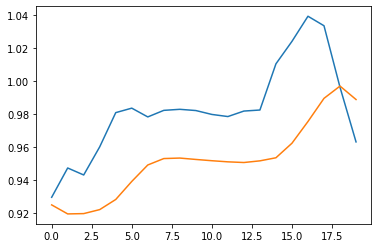

In [ ]:
plt.plot(X_test)
plt.plot(ypredict)

In [ ]:
import numpy as np

In [ ]:
arr=np.array([[1,2,3],[4,5,6]])

In [ ]:
arr.shape

(2, 3)

In [ ]:
arr=arr.reshape(1,) + arr.shape

ValueError: ignored

In [ ]:
arr.shape

(6,)

In [ ]:
arr

array([1, 2, 3, 4, 5, 6])